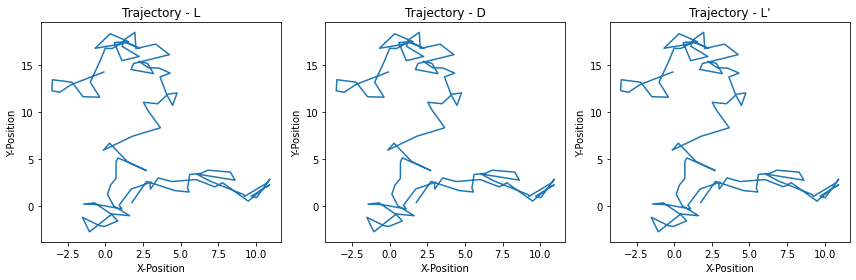

C:\Users\zjp778\AppData\Local\Temp/ipykernel_52220/1165196107.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


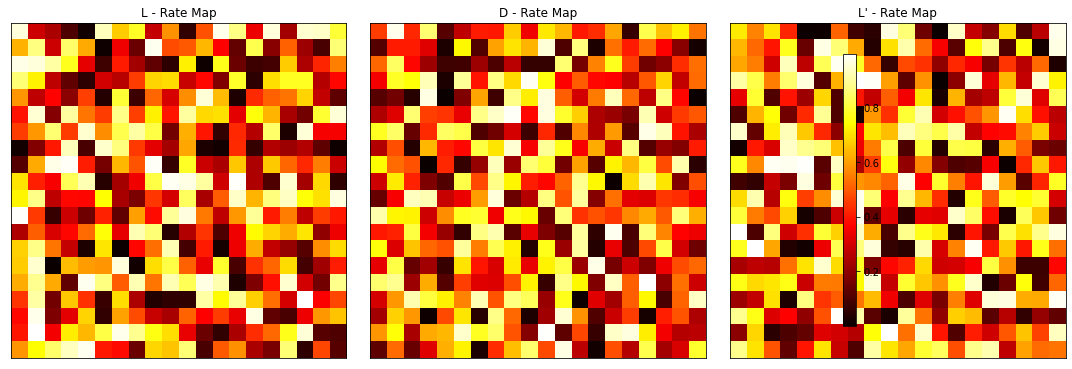

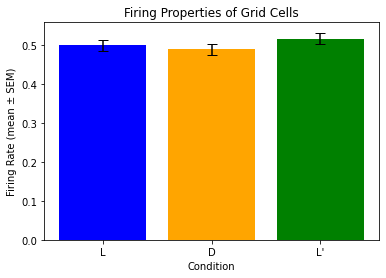

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def generate_synthetic_grid_cell_data(grid_spacing, orientation, light_conditions):
    """Generates synthetic grid cell data for different light conditions.

    Args:
        grid_spacing: Grid spacing.
        orientation: Grid orientation.
        light_conditions: A list of light conditions (e.g., 'L', 'D', 'L'").

    Returns:
        A dictionary containing:
            - 'rate_maps': A list of firing rate maps for each light condition.
            - 'spatial_correlations': A list of spatial correlations between light condition pairs (optional).
    """
    num_maps = len(light_conditions)
    rate_maps = [np.random.rand(20, 20) for _ in range(num_maps)]  # Placeholder for rate maps

    return {'rate_maps': rate_maps}

def generate_synthetic_trajectory(light_condition):
    """Generates a synthetic trajectory for a specific light condition.

    Args:
        light_condition: The light condition (e.g., 'L', 'D', 'L'").

    Returns:
        A list of (x, y) coordinates representing the animal's trajectory.
    """
    np.random.seed(0)
    num_steps = 100  # Number of steps for each trajectory
    trajectory = np.cumsum(np.random.randn(num_steps, 2), axis=0)  # Random walk trajectory
    return trajectory

def visualize_trajectory_maps(trajectories, light_conditions):
    """Visualizes the animal's trajectory for each light condition.

    Args:
        trajectories: A list of trajectories (x, y coordinates).
        light_conditions: A list of light conditions.
    """
    plt.figure(figsize=(12, 4))
    for i, (trajectory, light_condition) in enumerate(zip(trajectories, light_conditions)):
        plt.subplot(1, len(light_conditions), i+1)
        x, y = zip(*trajectory)
        plt.plot(x, y)
        plt.title(f"Trajectory - {light_condition}")
        plt.xlabel("X-Position")
        plt.ylabel("Y-Position")
    plt.tight_layout()
    plt.show()

def visualize_rate_maps(rate_maps, light_conditions):
    """Visualizes the grid cell's firing rate maps for each light condition.

    Args:
        rate_maps: A list of firing rate maps.
        light_conditions: A list of light conditions.
    """
    fig, axes = plt.subplots(1, len(light_conditions), figsize=(15, 5))
    for i, (rate_map, light_condition) in enumerate(zip(rate_maps, light_conditions)):
        im = axes[i].imshow(rate_map, cmap='hot')
        axes[i].set_title(f"{light_condition} - Rate Map")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.tight_layout()
    plt.show()

def plot_firing_properties(firing_properties, light_conditions):
    """Plots bar charts for firing properties of grid cells.

    Args:
        firing_properties: A dictionary containing the mean and SEM for each condition.
        light_conditions: A list of light conditions.
    """
    means = [firing_properties[cond]['mean'] for cond in light_conditions]
    sems = [firing_properties[cond]['sem'] for cond in light_conditions]

    plt.figure(figsize=(6, 4))
    plt.bar(light_conditions, means, yerr=sems, capsize=5, color=['blue', 'orange', 'green'])
    plt.xlabel('Condition')
    plt.ylabel('Firing Rate (mean ± SEM)')
    plt.title('Firing Properties of Grid Cells')
    plt.show()

def calculate_firing_properties(rate_maps, light_conditions):
    """Calculates the firing properties (mean and SEM) based on rate maps.

    Args:
        rate_maps: A list of firing rate maps.
        light_conditions: A list of light conditions.

    Returns:
        A dictionary with mean and SEM for each condition.
    """
    firing_properties = {}
    for i, (rate_map, light_condition) in enumerate(zip(rate_maps, light_conditions)):
        mean_firing = np.mean(rate_map)
        sem_firing = np.std(rate_map) / np.sqrt(rate_map.size)  # SEM = std / sqrt(N)
        firing_properties[light_condition] = {'mean': mean_firing, 'sem': sem_firing}
    return firing_properties

# Define the conditions (Light, Dark, Post-Light)
light_conditions = ['L', 'D', "L'"]

# Generate synthetic data
grid_cell_data = generate_synthetic_grid_cell_data(grid_spacing=50, orientation=np.pi/4, light_conditions=light_conditions)

# Generate trajectories
trajectories = [generate_synthetic_trajectory(light_condition) for light_condition in light_conditions]

# Visualize trajectory maps
visualize_trajectory_maps(trajectories, light_conditions)

# Visualize rate maps
visualize_rate_maps(grid_cell_data['rate_maps'], light_conditions)

# Calculate firing properties (mean ± SEM)
firing_properties = calculate_firing_properties(grid_cell_data['rate_maps'], light_conditions)

# Plot bar charts for firing properties
plot_firing_properties(firing_properties, light_conditions)
